In [2]:
#importing the required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from datetime import datetime

In [3]:
#setting the directory
os.chdir('C:/Users/aarad/OneDrive/Desktop/46927_85203_bundle_archive/')

In [4]:
#reading the given file
df = pd.read_csv('data.csv')

In [5]:
#shape of data
df.shape

(4600, 18)

In [6]:
#Country has only 1 value, so we can drop it
df = df.drop(['country'], axis = 1)

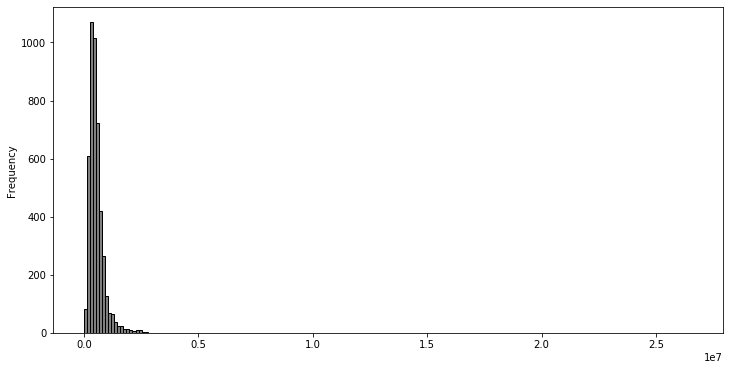

In [7]:
#looking at the price distribution of house
df['price'].plot(kind='hist', bins=200, figsize=(12,6), facecolor='grey',
                            edgecolor='black')

In [8]:
#making a new dataframe considering the outliesrs
house = df[(df['price']>0) & (df['bedrooms']>0)]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


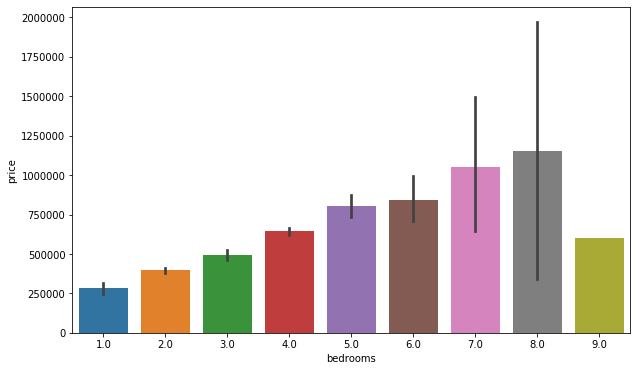

In [9]:
#plotting price distribution with respect to bedrooms
#using barplots
plt.figure(figsize = (10,6))
sns.barplot(x = house.bedrooms, y = house['price'])
house['6 or more'] = house['bedrooms']>=6

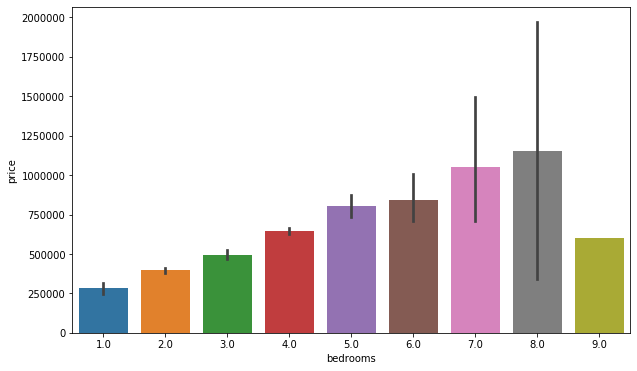

In [10]:
#plotting price distribution with respect to bedrooms
#using barplots
plt.figure(figsize = (10,6))
sns.barplot(x = house.bedrooms, y = house['price'])   

In [11]:
house['6 or more'] = house.apply(
        lambda row: 1 if (row['6 or more']) else 0,
        axis=1
    )

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
house['renovated_age'] = house.apply(
    lambda row: (2014-row['yr_renovated']) if (row['yr_renovated']>0) else row['yr_renovated'],
    axis=1
)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
house['age'] = 2014 - house['yr_built']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
#In order to deal with the outliers I am transforming price to natural logorithm
house['log_price'] = np.log(house['price'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


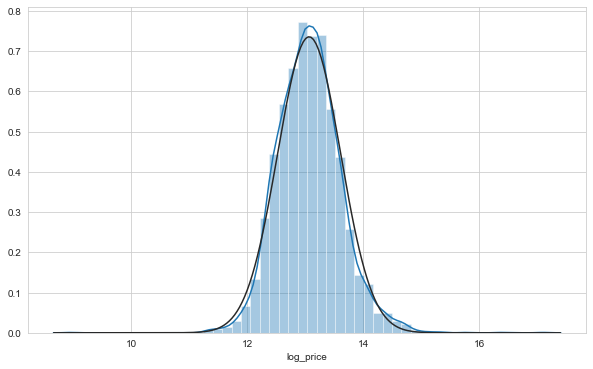

In [15]:
sns.set_style("whitegrid");
plt.figure(figsize = (10,6))
sns.distplot(house['log_price'], fit = norm)

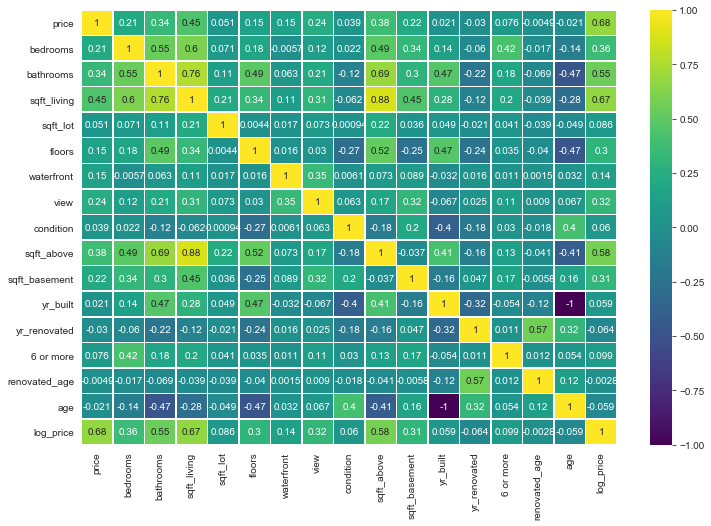

In [16]:
#plotting a heatmap to define correlation
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(house.corr(), annot = True, linewidths=.5, ax=ax, cmap = 'viridis')

In [17]:
house = house.drop(['yr_built', 'yr_renovated', 'price'], axis = 1)

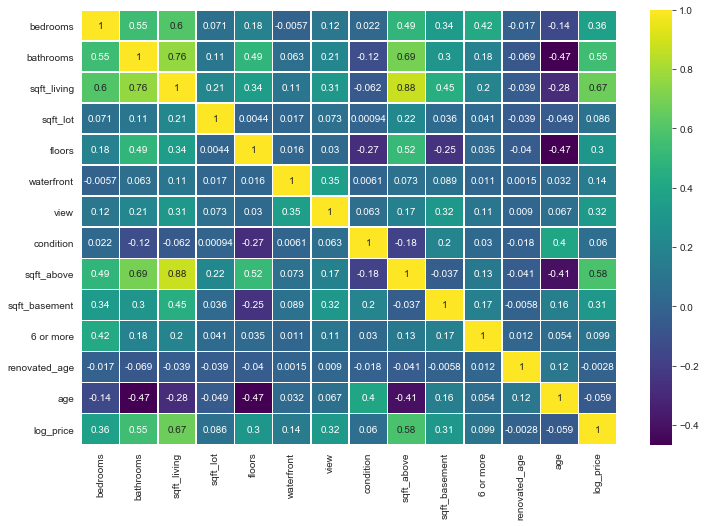

In [18]:
#plotting a heatmap to define correlation
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(house.corr(), annot = True, linewidths=.5, ax=ax, cmap = 'viridis')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [20]:
pd.get_dummies(house.street)

,1 View Ln NE,10 W Etruria St,100 20th Ave E,100 24th Ave E,100 Mt Si Pl NW,1000 Mountain View Blvd SE,10000-10026 S 100th St,10005 16th Ave S,10009 SE 247th Pl,1001 SW 102nd St,...,Indian Trail,Nuthatch Trail,SE 170th Pl,SE 21st Ct,Schmitz Park to Alki Trail,Shangri-La Way NW,Sunrise Loop Trail,Tolt Pipeline Trail,Trossachs Blvd SE,Valley View Trail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
encoded = pd.get_dummies(house.street)

In [22]:
house_out = pd.concat([house, encoded], axis=1)

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
house_out['city_num'] = labelencoder.fit_transform(house_out['city'])
house_out['city_num'].nunique()

44

In [24]:
house.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'street', 'city', 'statezip', '6 or more', 'renovated_age', 'age',
       'log_price'],
      dtype='object')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    house_out.drop(labels=['log_price', 'city', 'statezip', 'street','date'], axis=1),
    house_out['log_price'],
    test_size=0.2,
    random_state=0)
X_train.shape, X_test.shape


((3639, 4488), (910, 4488))

In [43]:
from sklearn import preprocessing
clf = LinearRegression().fit(preprocessing.normalize(X_train), y_train)

In [44]:
from sklearn import preprocessing
test_pred = clf.predict(preprocessing.normalize(X_test))
test_pred

array([ 1.13397324e+01,  7.77363861e+01,  1.20251603e+01,  1.17648133e+01,
        9.61428960e+01,  1.30200086e+01,  1.27438210e+01,  4.52729701e+02,
       -1.00304476e+02,  1.27794935e+01,  1.11144321e+01,  1.24742004e+01,
        1.06155470e+01,  1.27961673e+01,  1.29383151e+01,  1.81075850e+01,
        1.27991388e+01, -4.92721645e+03,  1.10206943e+01,  1.23978264e+01,
        1.24102368e+01,  1.29845997e+01,  1.25431248e+01,  1.24796536e+01,
       -3.92564239e+01,  1.21336807e+01,  1.27197453e+01,  1.17617504e+01,
        1.21976912e+01,  1.27459779e+01,  1.32230511e+01,  1.17314271e+01,
        1.25383645e+01,  6.16642371e+00,  1.25466609e+01,  1.26826863e+01,
        1.26597425e+01,  1.26282120e+01,  1.11783731e+01,  1.27491422e+01,
        1.23624071e+01,  1.23601515e+01,  1.22859847e+01,  1.33836192e+01,
        1.29650313e+01,  1.30607637e+01,  1.32052440e+01,  1.23993613e+01,
        1.24528112e+01,  1.25908962e+01,  1.52510112e+01,  1.22889472e+01,
       -5.88310569e+00,  

In [45]:
wmape = sum((abs(y_test - test_pred)) * 100) / sum(y_test)
wmape

1601.4962785616137

In [46]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [47]:
res = sm.OLS(y_train,X_train).fit()
print(res.summary())

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     39.12
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           8.26e-20
Time:                        15:54:30   Log-Likelihood:                 12375.
No. Observations:                3639   AIC:                        -1.753e+04
Df Residuals:                      31   BIC:                             4834.
Df Model:                        3607                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [48]:
house_city = house

In [49]:
house_city['city_num'] = labelencoder.fit_transform(house_city['city'])
house_city['city_num'].nunique()

44

In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    house_city.drop(labels=['log_price', 'city', 'statezip', 'street','date'], axis=1),
    house_city['log_price'],
    test_size=0.2,
    random_state=0)

In [51]:
res2 = sm.OLS(y_train2,X_train2).fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_price   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          2.239e+04
Date:                Tue, 08 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:54:32   Log-Likelihood:                         -6515.5
No. Observations:                3639   AIC:                                  1.306e+04
Df Residuals:                    3626   BIC:                                  1.314e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [52]:
#removing sqft_above as it is closely related to sqft_living
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    house_city.drop(labels=['log_price', 'city', 'statezip', 'street','date','sqft_above'], axis=1),
    house_city['log_price'],
    test_size=0.2,
    random_state=0)
res2 = sm.OLS(y_train3,X_train3).fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_price   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          2.239e+04
Date:                Tue, 08 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:54:32   Log-Likelihood:                         -6515.5
No. Observations:                3639   AIC:                                  1.306e+04
Df Residuals:                    3626   BIC:                                  1.314e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [53]:
#Feature extraction using Univariate selection
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X_train2, y_train2)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_train2)
# summarize selected features
print(features[0:5,:])

[1.269 2.229 4.18  0.905 1.212 1.439 1.797 0.996 2.955 1.561 0.901 1.16
 1.096 1.147]
[[1.75e+00 1.23e+03 0.00e+00 1.23e+03]
 [2.50e+00 2.55e+03 0.00e+00 1.61e+03]
 [2.50e+00 1.60e+03 0.00e+00 8.30e+02]
 [2.50e+00 2.83e+03 0.00e+00 2.83e+03]
 [3.50e+00 1.24e+03 0.00e+00 1.00e+03]]


In [54]:
#best features are bathrooms, sqft_living, sqft_above, condition, bederooms, age

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
house_ref = house_out
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    house_ref.drop(labels=['log_price', 'city', 'statezip', 'street','date'], axis=1),
    house_ref['log_price'],
    test_size=0.2,
    random_state=0)
model = LogisticRegression()
rfe = RFE(model, 6)
fit = rfe.fit(X_train3, y_train3)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

In [73]:
#removing sqft_above as it is closely related to sqft_living
house_fet = house
house_fet['city_num'] = labelencoder.fit_transform(house_fet['city'])
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    house_fet[['bathrooms', 'bedrooms', 'sqft_living','floors', 'condition','age','city_num']],
    house_fet['log_price'],
    test_size=0.2,
    random_state=0)
res2 = sm.OLS(y_train4,X_train4).fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_price   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          3.912e+04
Date:                Tue, 08 Sep 2020   Prob (F-statistic):                        0.00
Time:                        16:08:56   Log-Likelihood:                         -6628.4
No. Observations:                3639   AIC:                                  1.327e+04
Df Residuals:                    3632   BIC:                                  1.331e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------


'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'street', 'city', 'statezip', '6 or more', 'renovated_age', 'age',
       'log_price'